In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Datasets.
- 1. notification dataset.  
![Notification](images/trigger_data.jpg "Notification")
- 2. user log dataset. 
![User Log](images/user_log_data.jpg "User Log")
- 3. user data.
![User Data](images/user_data.jpg "User details")

Participants were randomised post-baseline to one of three versions of Healthy Mind: intelligent, daily, or occasional. Intelligent notifications were triggered at times when the algorithm predicted that a user was most likely to notice and respond. Opportune times for each user were identified by sampling data from three phone-based sensors: location (GPS), movement (accelerometer), and time of day (clock). The first two notifications were triggered at random, but within designated time and frequency parameters. The timing and frequency of notification triggering was then refined after every notification, that is, the app learned when and in what contexts notifications were responded to most often. Specifically users could receive up to 3 notifications per day between 08.00 and 22.00 hours. Users could customise the time range within which notifications were received. Following this learning period, a model of interruptibility was then built for each user using a Naïve Bayesian classifier that established a relationship between specific contexts and likelihood of notification response. Once the model was trained, the user’s context was sampled every 20 minutes to anticipate the likelihood of notification response.

The classifier utilised location (GPS), movement (accelerometer) and time variables that were derived from the raw sensor readings. Initially, users’ sampled GPS co-ordinates were clustered and averaged within particular time-frames to infer “home” (01.00 to 06.00 hours), “work” (10.00–16.00 hours), and “other” locations. GPS co-ordinates within a 500m radius of “home” or “work” co-ordinates were then labelled as “home” or “work”. Co-ordinates outside of this radius were labelled “other”. Accelerometer X, Y, and Z values were collected for 60s within each 20 minute sampling window. In line with previous activity recognition research, the mean intensity of acceleration, the variance of acceleration and the mean crossing rate were then calculated from the raw accelerometer values to provide a proxy measure of movement [29]. Time variables were hour of day and weekend versus weekday.

A notification was only triggered if a yes label was returned (i.e. notification response was deemed likely). The relative weighting of each sensed variable within the classifier varied between users. That is, the model of interruptibility was personalised to each individual user. A Naïve Bayesian classifier assumed that variables within each personalised model were unrelated. This means that the relative weighting of each sensed variable did not vary with respect to other variables in the model. For example, the importance placed on a user’s motion within the classifier remained the same regardless of whether the user was designated to be at home, work or other location. The sensing, data processing, and generation of interruptibility models were handled by independent open-source Android libraries

**Implication**

The results from this study suggest that, in naturalistic settings, tailoring notification delivery to location, movement, and time of day may not always offer any advantage over a priori assumptions about convenient moments. Smartphones offer a wide range of contextual data that were not utilised in the current study. It may be that alternative combinations of sensor data will enhance response rates and intervention usage. The results from this study also suggest that sending frequent, daily notifications may not deter users from engaging with an app-based intervention and could mean that they are exposed to more of the intervention content. However, precise thresholds for the frequency at which notifications deter or encourage intervention usage are not yet known. For example, it may be that while daily notifications are acceptable, several notifications per day may be unacceptable. Similarly, too many intelligent, sensor-driven notifications may be perceived by users as random. Optimal thresholds may also vary for different population sub-groups and health behaviours. Larger scale studies are needed to test the hypotheses generated from this study and to examine the impact of other combinations of sensor data and different notification delivery schedules.

Current approaches to measuring intervention engagement typically rely on objectively recorded usage data, which may underestimate engagement with the intervention content. It may be that initial notification receipt or observed app usage provided reminders to practice relevant tools at a later time. Subsequent practice of the tool will not be reflected in the observed usage patterns. Identifying variables that indicate optimal receptivity to intervention content is an ongoing challenge for the development of just-in-time adaptive interventions [43]. Nested qualitative studies can provide more in-depth insight of participants’ experiences following the intervention and their potential reasons for continued engagement or disengagement [33]. Adoption of a mixed-methods approach to evaluating digital interventions can support more informed and appropriate conceptualisations about what constitutes poor versus successful engagement and the factors that underlie whether and when an individual stops using an intervention. Additional work is needed to identify and evaluate novel methods for assessing engagement with digital interventions that can capture off-line activities and experiences.

In [2]:
# functions / functions



In [2]:
noti = pd.read_csv('noti_data.csv')          # 1
user_data = pd.read_csv('user_data.csv')     # 3
user_log = pd.read_csv('user_log_data.csv')  # 2

## Notifications

In [5]:
noti['e'] = 1
noti.fillna(0, inplace=True)
noti.head()

,id,trigger number,notification time,was followed,followed time,delay,e
0,1,1,13-10-14 12:19:24,1.0,13-10-2014 12:32,803,1
1,1,2,13-10-14 18:04:42,1.0,13-10-2014 18:44,2401,1
2,1,3,14-10-14 11:12:25,0.0,0,0,1
3,3,1,08-10-14 20:16:28,1.0,08-10-2014 23:00,9852,1
4,3,2,11-10-14 20:09:49,0.0,0,0,1


In [6]:
noti['was followed'].value_counts()

0.0    4636
1.0     801
Name: was followed, dtype: int64

In [7]:
## Adding columns
noti['notification time'] = pd.to_datetime(noti['notification time'])
noti['followed time'] = pd.to_datetime(noti['followed time'])

## For notification time

noti['n_date'] = noti['notification time'].apply(lambda x:x.date())
noti['n_hour'] = noti['notification time'].apply(lambda x:x.hour)
noti['n_month'] = noti['notification time'].apply(lambda x:x.month)
noti['n_day'] = noti['notification time'].apply(lambda x:x.dayofweek)
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
noti['n_day'] = noti['n_day'].map(day_map)

## For followed time

noti['f_date'] = noti['followed time'].apply(lambda x:x.date())
noti['f_hour'] = noti['followed time'].apply(lambda x:x.hour)
noti['f_month'] = noti['followed time'].apply(lambda x:x.month)
noti['f_day'] = noti['followed time'].apply(lambda x:x.dayofweek)
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
noti['f_day'] = noti['f_day'].map(day_map)

noti.head()

,id,trigger number,notification time,was followed,followed time,delay,e,n_date,n_hour,n_month,n_day,f_date,f_hour,f_month,f_day
0,1,1,2014-10-13 12:19:24,1.0,2014-10-13 12:32:00,803,1,2014-10-13,12,10,Mon,2014-10-13,12,10,Mon
1,1,2,2014-10-13 18:04:42,1.0,2014-10-13 18:44:00,2401,1,2014-10-13,18,10,Mon,2014-10-13,18,10,Mon
2,1,3,2014-10-14 11:12:25,0.0,1970-01-01 00:00:00,0,1,2014-10-14,11,10,Tue,1970-01-01,0,1,Thu
3,3,1,2014-08-10 20:16:28,1.0,2014-08-10 23:00:00,9852,1,2014-08-10,20,8,Sun,2014-08-10,23,8,Sun
4,3,2,2014-11-10 20:09:49,0.0,1970-01-01 00:00:00,0,1,2014-11-10,20,11,Mon,1970-01-01,0,1,Thu


In [35]:
#noti.to_csv('noti_extended.csv')

In [8]:
g_day = noti[noti['was followed'] == 1.0].groupby(by=['n_day']).mean()

In [9]:
##  -- Will not be used in visualization. Or is it?
g_day

,trigger number,was followed,delay,e,n_hour,n_month,f_hour,f_month
n_day,,,,,,,,
Fri,22.959350,1.0,12229.325203,1.0,17.528455,7.536585,16.666667,7.569106
Mon,22.086538,1.0,12299.105769,1.0,18.346154,8.413462,17.625000,8.461538
Sat,26.194690,1.0,14788.982301,1.0,17.690265,8.283186,16.867257,8.353982
Sun,30.920792,1.0,10828.168317,1.0,18.059406,8.316832,17.445545,8.297030
Thu,19.695946,1.0,9366.108108,1.0,17.837838,8.027027,17.506757,8.108108
Tue,28.270000,1.0,13444.770000,1.0,18.090000,8.160000,17.760000,7.980000
Wed,26.642857,1.0,12387.571429,1.0,17.758929,7.839286,17.562500,7.883929


In [10]:
noti[noti['was followed'] == 1.0][['n_hour','f_hour']].describe()

,n_hour,f_hour
count,801.000000,801.000000
mean,17.883895,17.334582
std,2.991697,4.930559
min,0.000000,0.000000
25%,18.000000,16.000000
50%,19.000000,19.000000
75%,20.000000,20.000000
max,22.000000,23.000000


 -_-

F:\TBINSTALLS\conda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


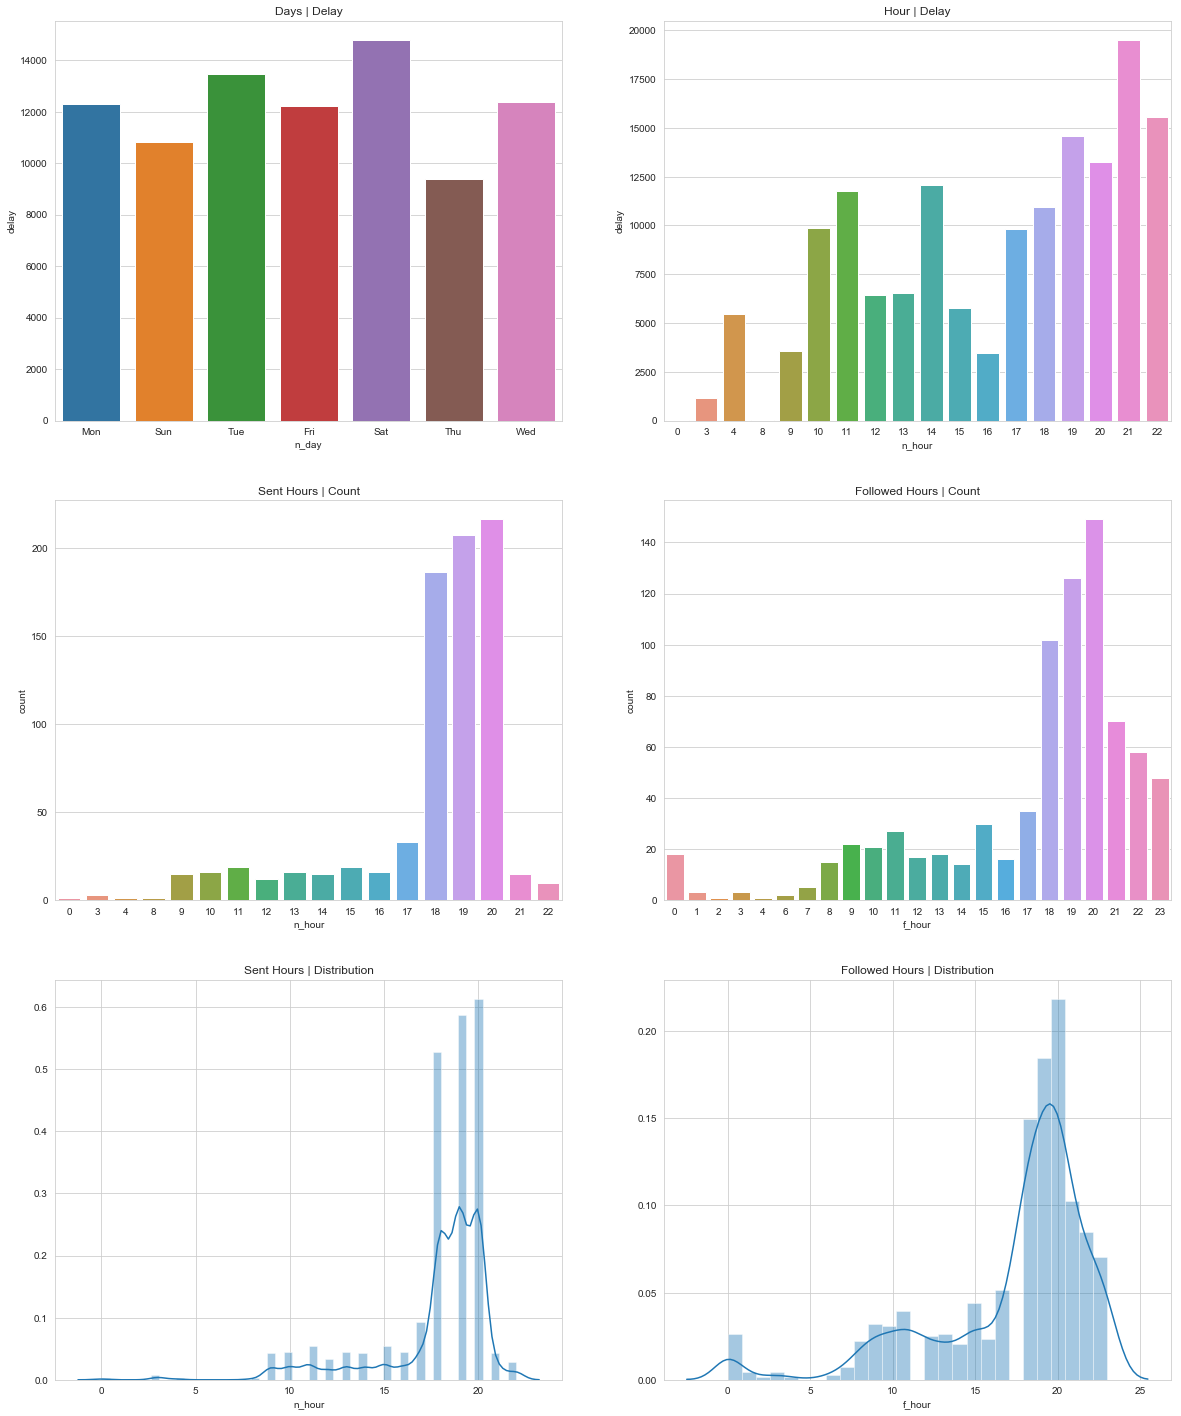

In [11]:
# Cumulative not specific to Groups involved in the study..
fig, axs = plt.subplots(ncols=2, nrows = 3, figsize = (20,25))
plt.tight_layout

# Plot showing the mean of the notifications send at specific hours and delay associated with it. 

sns.barplot(x = 'n_day', y = 'delay', data = noti[noti['was followed'] == 1.0], ci = None, ax = axs[0][0])
axs[0][0].title.set_text('Days | Delay')
sns.barplot(x = 'n_hour', y = 'delay', data = noti[noti['was followed'] == 1.0], ci = None, ax = axs[0][1])
axs[0][1].title.set_text('Hour | Delay')

# for followed activities. Shows number of times the notification where clicked
# 'f_hours' represent the time when notification where clicked.
# contrast between the send and viewed time is tried to be shown below.


sns.countplot(x = 'n_hour', data = noti[noti['was followed'] == 1.0], ax = axs[1][0])
axs[1][0].title.set_text('Sent Hours | Count')
sns.countplot(x = 'f_hour', data = noti[noti['was followed'] == 1.0], ax = axs[1][1])
axs[1][1].title.set_text('Followed Hours | Count')

## Distributions

sns.distplot(noti[noti['was followed'] == 1.0]['n_hour'], ax = axs[2][0])
axs[2][0].title.set_text('Sent Hours | Distribution')
sns.distplot(noti[noti['was followed'] == 1.0]['f_hour'], ax = axs[2][1])
axs[2][1].title.set_text('Followed Hours | Distribution')

In [12]:
#fig.savefig('1_cumulative_notifications.jpg')

## User Log

In [3]:
user_log.head(2)

,id,activity id,page,activity type,status,time,status.1,time.1,seconds on page,session number,time since last log
0,1,Healthy Mind: Basline Consent,Healthy Mind: Basline Consent,info,start,13-10-14 10:37:14.858,NaN,NaN,0,1,0.00
1,1,Healthy Mind: Basline Consent,Healthy Mind: Basline Consent,info,start,13-10-14 10:37:15.094,complete,13-10-14 10:37:48.662,33,1,0.24


In [14]:
# session number - user access the app on seperate occassion

In [15]:
user_log['time since last log'].describe()

count    1.282500e+04
mean     4.574482e+04
std      3.260384e+05
min      0.000000e+00
25%      7.000000e-02
50%      2.400000e-01
75%      2.140000e+00
max      1.090247e+07
Name: time since last log, dtype: float64

## User Data

In [18]:
user_data.head()

,id,signup time,Group,age,gender,qual
0,1,13-10-2014 09:39,1.0,48.0,Female,Degree
1,3,07-10-2014 22:07,3.0,42.0,Male,GCSEs / O levels or similar
2,4,04-09-2014 09:53,3.0,15.0,Male,Degree
3,5,17-09-2014 10:43,2.0,50.0,Male,Other
4,6,09-09-2014 20:35,2.0,5.0,Male,GCSEs / O levels or similar


In [19]:
user_data['Group'].value_counts()

3.0    57
2.0    53
1.0    52
Name: Group, dtype: int64

## Combined

In [20]:
noti.head()

,id,trigger number,notification time,was followed,followed time,delay,e,n_date,n_hour,n_month,n_day,f_date,f_hour,f_month,f_day
0,1,1,2014-10-13 12:19:24,1.0,2014-10-13 12:32:00,803,1,2014-10-13,12,10,Mon,2014-10-13,12,10,Mon
1,1,2,2014-10-13 18:04:42,1.0,2014-10-13 18:44:00,2401,1,2014-10-13,18,10,Mon,2014-10-13,18,10,Mon
2,1,3,2014-10-14 11:12:25,0.0,1970-01-01 00:00:00,0,1,2014-10-14,11,10,Tue,1970-01-01,0,1,Thu
3,3,1,2014-08-10 20:16:28,1.0,2014-08-10 23:00:00,9852,1,2014-08-10,20,8,Sun,2014-08-10,23,8,Sun
4,3,2,2014-11-10 20:09:49,0.0,1970-01-01 00:00:00,0,1,2014-11-10,20,11,Mon,1970-01-01,0,1,Thu


In [21]:
dummy = noti.drop(labels=['n_month','f_month','notification time','followed time'], axis = 1)
dummy.head(12)

,id,trigger number,was followed,delay,e,n_date,n_hour,n_day,f_date,f_hour,f_day
0,1,1,1.0,803,1,2014-10-13,12,Mon,2014-10-13,12,Mon
1,1,2,1.0,2401,1,2014-10-13,18,Mon,2014-10-13,18,Mon
2,1,3,0.0,0,1,2014-10-14,11,Tue,1970-01-01,0,Thu
3,3,1,1.0,9852,1,2014-08-10,20,Sun,2014-08-10,23,Sun
4,3,2,0.0,0,1,2014-11-10,20,Mon,1970-01-01,0,Thu
5,3,3,1.0,44,1,2014-10-14,19,Tue,2014-10-14,19,Tue
6,3,4,1.0,10654,1,2014-10-17,19,Fri,2014-10-17,21,Fri
7,3,5,0.0,0,1,2014-10-20,18,Mon,1970-01-01,0,Thu
8,3,6,0.0,0,1,2014-10-23,20,Thu,1970-01-01,0,Thu
9,3,7,0.0,0,1,2014-10-26,19,Sun,1970-01-01,0,Thu


**Adding experiment group**

In [22]:
f = lambda x: user_data[user_data['id'] == x]['Group'].iloc[0]
dummy['group'] = dummy['id'].map(f)
# 1- intelligent 2 - daily 3 - occasional
g_dic = {1.0:'Intelligent', 2.0:'Daily', 3.0:'Occasional'}
dummy['group'] = dummy['group'].map(g_dic)
dummy.head()

,id,trigger number,was followed,delay,e,n_date,n_hour,n_day,f_date,f_hour,f_day,group
0,1,1,1.0,803,1,2014-10-13,12,Mon,2014-10-13,12,Mon,Intelligent
1,1,2,1.0,2401,1,2014-10-13,18,Mon,2014-10-13,18,Mon,Intelligent
2,1,3,0.0,0,1,2014-10-14,11,Tue,1970-01-01,0,Thu,Intelligent
3,3,1,1.0,9852,1,2014-08-10,20,Sun,2014-08-10,23,Sun,Occasional
4,3,2,0.0,0,1,2014-11-10,20,Mon,1970-01-01,0,Thu,Occasional


In [23]:
# Number of People under different study.
dummy[dummy['was followed'] == 1.0]['group'].value_counts()

Daily          335
Intelligent    217
Occasional     210
Name: group, dtype: int64

In [36]:
#dummy.to_csv('dummy.csv')

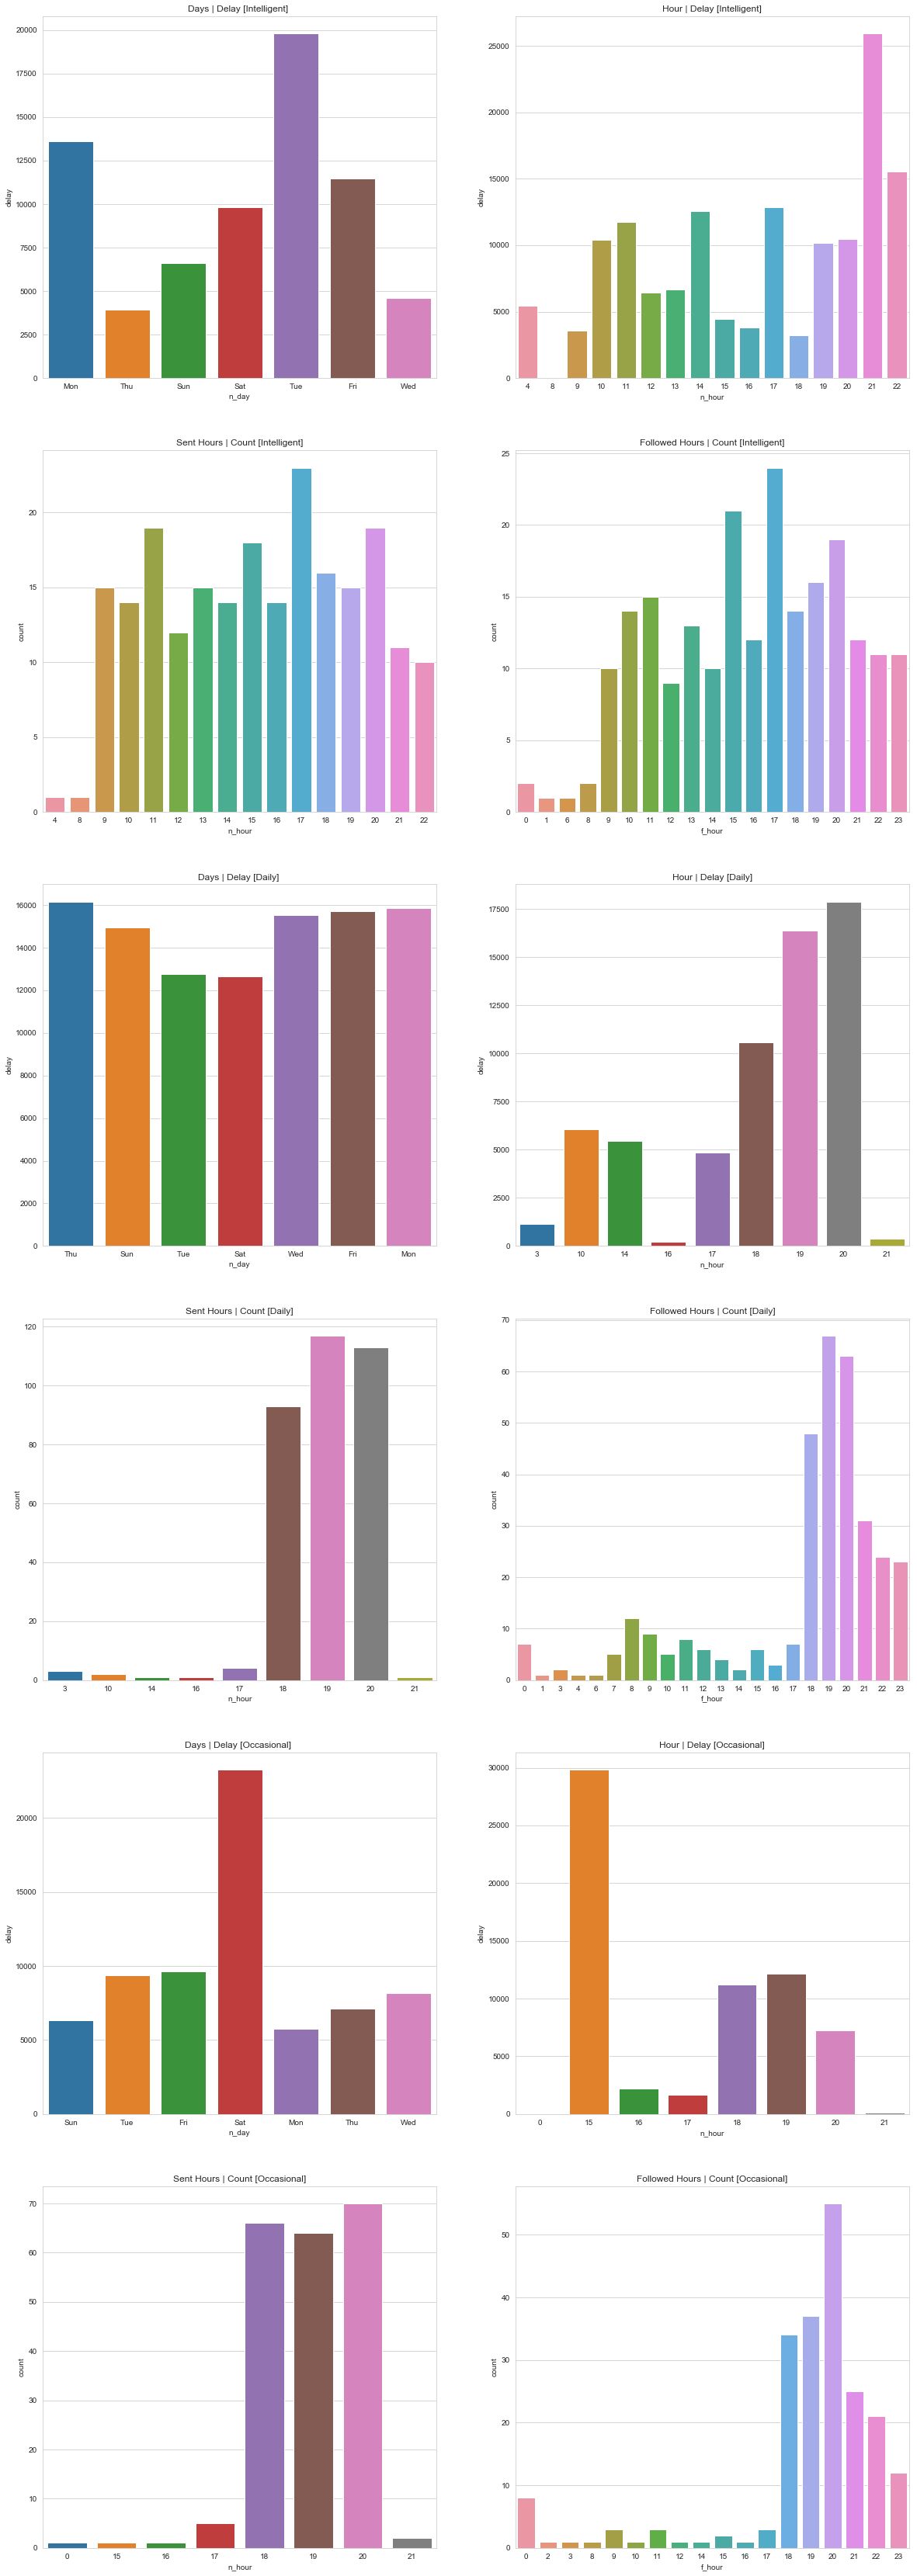

In [24]:
fig, axs = plt.subplots(ncols=2, nrows = 6, figsize = (20,60))
plt.tight_layout
# Masks

c = dummy['was followed'] == 1.0
c1 = dummy['group'] == 'Intelligent'
c2 = dummy['group'] == 'Daily'
c3 = dummy['group'] == 'Occasional'

############# RULE 1 ############################
sns.barplot(x = 'n_day', y = 'delay', data = dummy[c & c1] , ci = None, ax = axs[0][0])
axs[0][0].title.set_text('Days | Delay [Intelligent] ')
sns.barplot(x = 'n_hour', y = 'delay', data = dummy[c & c1] , ci = None, ax = axs[0][1])
axs[0][1].title.set_text('Hour | Delay [Intelligent]')

sns.countplot(x = 'n_hour', data = dummy[c & c1], ax = axs[1][0])
axs[1][0].title.set_text('Sent Hours | Count [Intelligent]')
sns.countplot(x = 'f_hour', data = dummy[c & c1], ax = axs[1][1])
axs[1][1].title.set_text('Followed Hours | Count [Intelligent]')

############# RULE 2 ############################

sns.barplot(x = 'n_day', y = 'delay', data = dummy[c & c2] , ci = None, ax = axs[2][0])
axs[2][0].title.set_text('Days | Delay [Daily] ')
sns.barplot(x = 'n_hour', y = 'delay', data = dummy[c & c2] , ci = None, ax = axs[2][1])
axs[2][1].title.set_text('Hour | Delay [Daily]')

sns.countplot(x = 'n_hour', data = dummy[c & c2], ax = axs[3][0])
axs[3][0].title.set_text('Sent Hours | Count [Daily]')
sns.countplot(x = 'f_hour', data = dummy[c & c2], ax = axs[3][1])
axs[3][1].title.set_text('Followed Hours | Count [Daily]')

############# RULE 3 ############################

sns.barplot(x = 'n_day', y = 'delay', data = dummy[c & c3] , ci = None, ax = axs[4][0])
axs[4][0].title.set_text('Days | Delay [Occasional] ')
sns.barplot(x = 'n_hour', y = 'delay', data = dummy[c & c3] , ci = None, ax = axs[4][1])
axs[4][1].title.set_text('Hour | Delay [Occasional]')

sns.countplot(x = 'n_hour', data = dummy[c & c3], ax = axs[5][0])
axs[5][0].title.set_text('Sent Hours | Count [Occasional]')
sns.countplot(x = 'f_hour', data = dummy[c & c3], ax = axs[5][1])
axs[5][1].title.set_text('Followed Hours | Count [Occasional]')

#################################################




In [25]:
#fig.savefig('2_comparison_groupwise_basic.jpg')

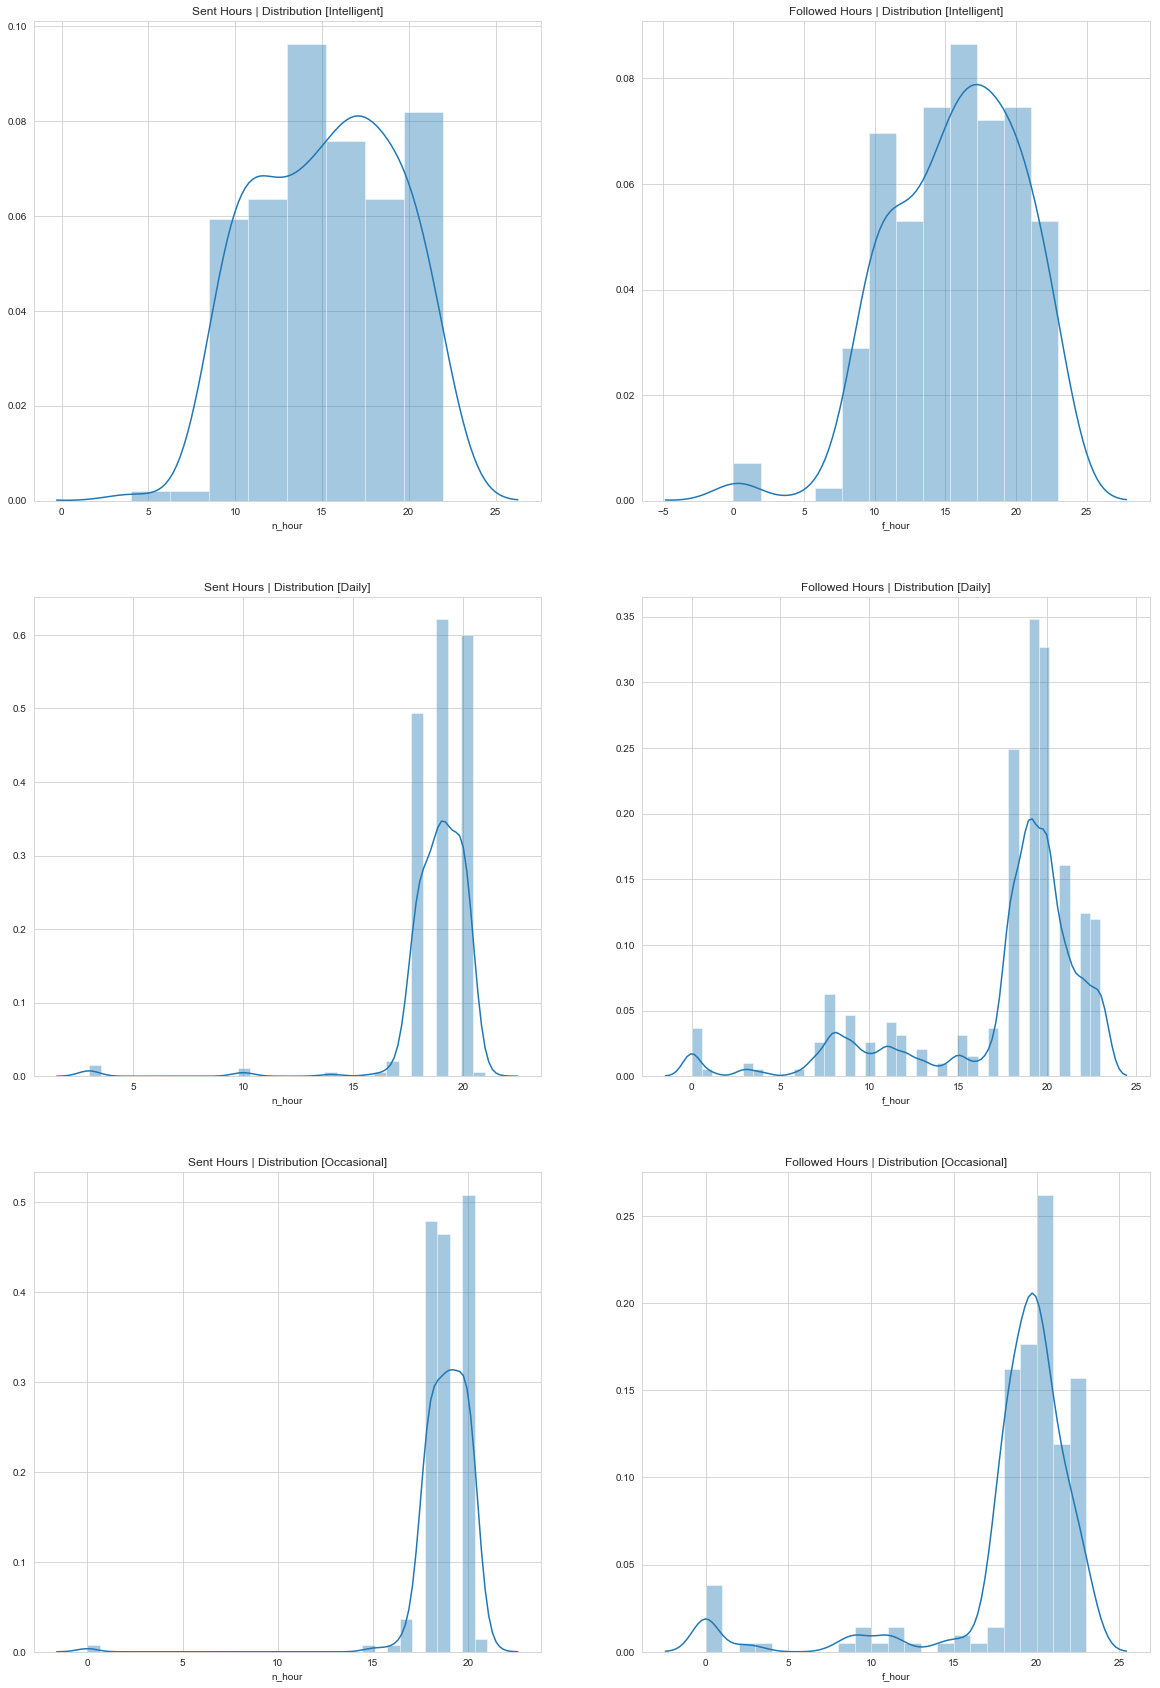

In [26]:
## For Distributions
fig, axs = plt.subplots(ncols=2, nrows = 3, figsize = (20,30))
plt.tight_layout
######## Intelligent ########
sns.distplot(dummy[c & c1]['n_hour'], ax = axs[0][0])
axs[0][0].title.set_text('Sent Hours | Distribution [Intelligent]')
sns.distplot(dummy[c & c1]['f_hour'], ax = axs[0][1])
axs[0][1].title.set_text('Followed Hours | Distribution [Intelligent]')
######## Daily ########
sns.distplot(dummy[c & c2]['n_hour'], ax = axs[1][0])
axs[1][0].title.set_text('Sent Hours | Distribution [Daily]')
sns.distplot(dummy[c & c2]['f_hour'], ax = axs[1][1])
axs[1][1].title.set_text('Followed Hours | Distribution [Daily]')
######## Occasional ########
sns.distplot(dummy[c & c3]['n_hour'], ax = axs[2][0])
axs[2][0].title.set_text('Sent Hours | Distribution [Occasional]')
sns.distplot(dummy[c & c3]['f_hour'], ax = axs[2][1])
axs[2][1].title.set_text('Followed Hours | Distribution [Occasional]')



In [27]:
#fig.savefig('3_comparison_groupwise_distribution.jpg')

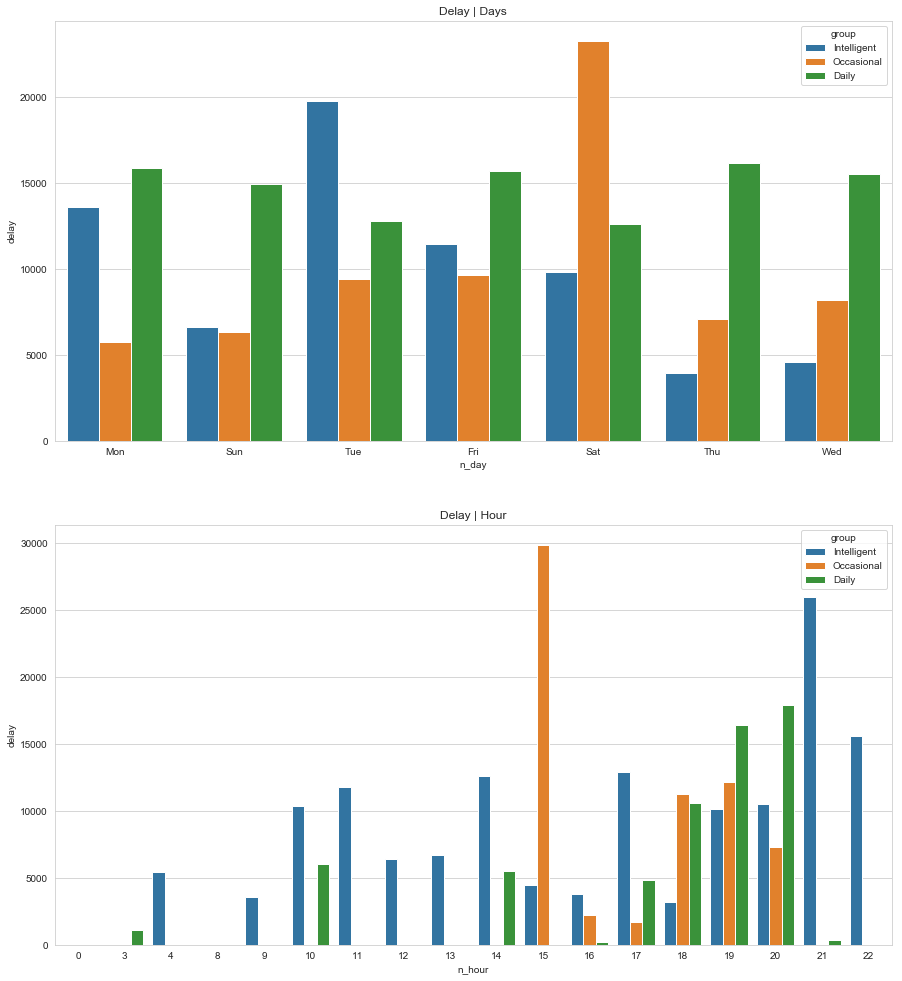

In [28]:
fig, axs = plt.subplots(nrows = 2, figsize = (15,17))
plt.tight_layout
sns.barplot(x = 'n_day', y = 'delay', data = dummy[c], ci=None, hue='group', ax = axs[0])
axs[0].title.set_text('Delay | Days')
# check seaborn lineplot its 😎

sns.barplot(x = 'n_hour', y = 'delay', data = dummy[c], hue='group', ci = None, ax = axs[1])
axs[1].title.set_text('Delay | Hour')

In [29]:
#fig.savefig('4_Delay_comparison_groupwise.jpg')

In [30]:
# Grouped by Sent times and finised -- doing same thing over and over again !!😢
grp_f_dummy = dummy[c].groupby(['f_hour','group'])['e'].sum().unstack().fillna(0).reset_index()
grp_n_dummy = dummy[c].groupby(['n_hour','group'])['e'].sum().unstack().fillna(0).reset_index()
print(grp_f_dummy.head())
grp_n_dummy.head()


group  f_hour  Daily  Intelligent  Occasional
0           0    7.0          2.0         8.0
1           1    1.0          1.0         0.0
2           2    0.0          0.0         1.0
3           3    2.0          0.0         1.0
4           4    1.0          0.0         0.0


group,n_hour,Daily,Intelligent,Occasional
0,0,0.0,0.0,1.0
1,3,3.0,0.0,0.0
2,4,0.0,1.0,0.0
3,8,0.0,1.0,0.0
4,9,0.0,15.0,0.0


In [31]:
grp_f_dummy.head(10)


group,f_hour,Daily,Intelligent,Occasional
0,0,7.0,2.0,8.0
1,1,1.0,1.0,0.0
2,2,0.0,0.0,1.0
3,3,2.0,0.0,1.0
4,4,1.0,0.0,0.0
5,6,1.0,1.0,0.0
6,7,5.0,0.0,0.0
7,8,12.0,2.0,1.0
8,9,9.0,10.0,3.0
9,10,5.0,14.0,1.0


In [32]:
grp_f_dummy['Intelligent'].max()

24.0

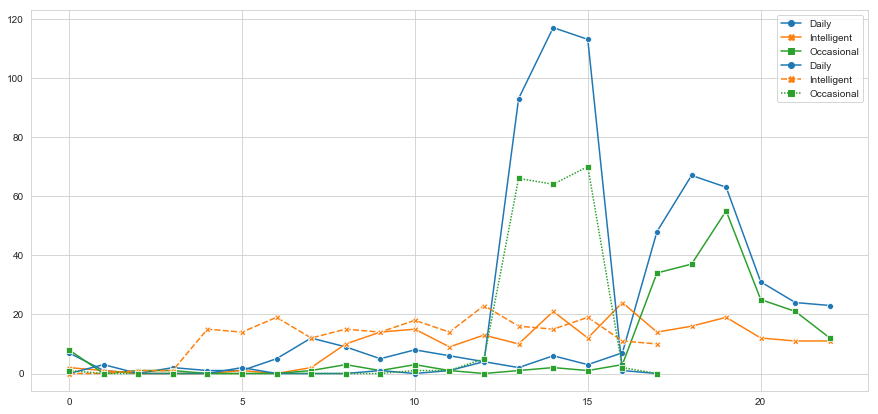

In [33]:
# number of click in different groups
fig=plt.figure(figsize = (15,7))
sns.lineplot(data = grp_f_dummy.drop(labels='f_hour',axis = 1), style = 'event', markers=True, dashes = False)
sns.lineplot(data = grp_n_dummy.drop(labels='n_hour',axis = 1), style = 'event', markers=True, dashes = True)


In [34]:
#fig.savefig('5_c_lineplots.jpg',dpi = 300)

**Adding seconds on page**
<br>
(time spend on specified activity - analogous to using of the application)

**Adding Session Number**
<br>
(Number of time the app was accessed on seperate occasion)

**Adding time since last log**

**Unleash the power of Machine Learning**